In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
v=0.25
lbg=0.1
k=0.0003
kbg=0.4
I0=300.0
mumax=1.2
rhomax=0.2
m=15.0
qmax=0.04
qmin=0.004
h=120.0
d=10.0
# Redfield ratio = 0.022 for q

zmax = 10.0
dz = 1.0
dt = dz**2/40 # change this

z_grid = np.arange(0,zmax,dz)
A = np.ones(int(zmax/dz))*300
Rb = np.ones(int(zmax/dz))*2.2
Rd = np.ones(int(zmax/dz))*30
I = np.ones(int(zmax/dz))*I0

def p(I,q):
    return mumax * (1.0 - qmin/q) * (I/(h + I))

def rho(q, Rd):
    return rhomax * (qmax-q)/(qmax-qmin) * ( Rd/(m + Rd) )

In [3]:
# check - dt must be much smaller than dz for stability, try to get expression later?
dt/dz**2

0.025

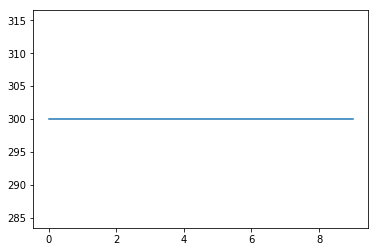

In [4]:
plt.plot(z_grid,A)

In [5]:
z_next, A_next = next_A(z_grid,A,Rb,Rd,I)
plt.plot(z_grid,A_next)

NameError: name 'next_A' is not defined

In [59]:
def next_step(z,A,Rb,Rd,I):
    """For testing."""
    
    A_next = np.zeros(len(A))
    Rb_next = np.zeros(len(A))
    Rd_next =np.zeros(len(A))
    I_next = np.zeros(len(A))
    
    q = Rb[1:-1]/A[1:-1]
    pp = p(I[1:-1],q)
    rrho = rho(q,Rd[1:-1])
    
    A_next[1:-1] = dt*(d/(dz**2) - v/(2*dz))*A[2:] \
    + (1 + dt*pp - dt*lbg - 2*dt*d/(dz**2))*A[1:-1] \
    + dt*(d/(dz**2)- v/(2*dz))*A[:-2]
    A_next[0] = 4*d/(2*v*dz + 3*d)*A_next[1] - d/(2*v*dz + 3*d)*A_next[2]
    A_next[-1] = (4*A_next[-2] - A_next[-3])/3
    
    Rb_next[1:-1] = dt*(d/(dz**2) - v/(2*dz))*Rb[2:] \
    + (1 - dt*lbg - 2*dt*d/(dz**2))*Rb[1:-1] \
    + dt*(d/(dz**2) - v/(2*dz))*Rb[:-2] + dt*rrho*A[1:-1]
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2]
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3
    
    Rd_next[1:-1] = d*dt/(dz**2)*Rd[2:] \
    + (1 - 2*dt*d/(dz**2))*Rd[1:-1] \
    + d*dt/(dz**2)*Rd[:-2] \
    - dt*rrho*A[1:-1] + dt*lbg*Rb[1:-1]
    Rd_next[0] = 4*Rd[1]/3 - Rd[2]/3
    Rd_next[-1] = -Rd[-3]/3 + 4*Rd[-2]/3 - 2*v*dz*Rb[-1]/(3*d)
    
    I_next[1:] = -(dt*k*A[1:] + dt*kbg*z[1:] - 1)*I[1:]
    I_next[0] = I0
    
    return z, A_next, Rb_next, Rd_next, I_next

In [60]:
next_step(z_grid,A,Rb,Rd,I)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([295.37417501, 300.29707792, 300.29707792, 300.29707792,
        300.29707792, 300.29707792, 300.29707792, 300.29707792,
        300.29707792, 300.29707792]),
 array([3.03753188, 3.08815741, 3.08815741, 3.08815741, 3.08815741,
        3.08815741, 3.08815741, 3.08815741, 3.08815741, 3.08815741]),
 array([30.        , 29.09809259, 29.09809259, 29.09809259, 29.09809259,
        29.09809259, 29.09809259, 29.09809259, 29.09809259, 29.96333333]),
 array([300.   , 296.325, 293.325, 290.325, 287.325, 284.325, 281.325,
        278.325, 275.325, 272.325]))

In [57]:
def next_I(z,A,Rb,Rd,I):
    
    I_next = np.zeros(len(A)) 
    q = Rb[1:-1]/A[1:-1]
    pp = p(I[1:-1],q)
    rrho = rho(q,Rd[1:-1])
    
    I_next[1:] = -(dt*k*A[1:] + dt*kbg*z[1:] - 1)*I[1:]
    I_next[0] = I0
    
    return z, I_next

In [58]:
next_I(z_grid,A,Rb,Rd,I)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([300.   , 296.325, 293.325, 290.325, 287.325, 284.325, 281.325,
        278.325, 275.325, 272.325]))

# Final Code

In [26]:
def next_step_old(A,Rb,Rd,I):
    """ A,Rb,Rd & I arrays of length z_max/delta_z. Need to check if BCs right or if should be using FDM on them too."""
    # check all arrays same length
    
    A_next = Rb_next = Rd_next = I_next = np.zeros(len(A))

    q = Rd[1:-1]/A[1:-1]
    pp = p(I[1:-1],q)
    rrho = rho(q,Rd[1:-1])


    A_next[1:-1] = dt*(d/(dz**2) - v/(2*dz))*A[2:] \
    + (1 + dt*pp - dt*lbg - 2*dt*d/(dz**2)*A[1:-1]) \
    + dt*(d/(dz**2)- v/(2*dz))*A[:-2]
    A_next[0] = 4*d/(2*v*dz - 3*d)*A_next[1] - 1/(2*v*dz - 3*d)*A_next[2]
    A_next[-1] = (4*A_next[-2] - A_next[-3])/3
                    
    Rb_next[-1:1] = dt*(d/(dz**2) - v/(2*dz))*Rb[2:] \
    + (1 - dt*lbg - 2*dt*d/(dz**2))*Rb[1:-1] \
    + dt*(d/(dz**2) - v/(2*dz))*Rb[:-2] \
    + dt*rrho*A[1:-1]
    Rb_next[0] = 4*d/(2*v*dz - 3*d)*Rb_next[1] - 1/(2*v*dz - 3*d)*Rb_next[2]
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3
                                      
    Rd_next[-1:1] = d*dt/(dz**2)*Rd[2:] \
    + (-1 - 2*dt*d/(dz**2))*Rd[1:-1] \
    + d*dt/(dz**2)*Rd[:-2] \
    - dt*rrho*A[1:-1] + lbg*Rb[1:-1]
    Rd_next[0] = -3*Rd[0] + 4*Rd[1] - Rd[2]
    Rd_next[-1] = -d*Rd[-3] + 4*d*Rd[-2] - 3*d*Rd[-1] - v*Rb[0]
    
    return A_next, Rb_next
    

In [17]:
q = Rd[1:-1]/A[1:-1]
pp = p(I[1:-1],q)
rrho = rho(q,Rd[1:-1])

In [18]:
A_next[1:-1] = dt*(d/(dz**2) - v/(2*dz))*A[2:] \
+ (1 + dt*pp - dt*lbg - 2*dt*d/(dz**2)*A[1:-1]) \
+ dt*(d/(dz**2)- v/(2*dz))*A[:-2]
A_next[0] = 4*d/(2*v*dz - 3*d)*A_next[1] - 1/(2*v*dz - 3*d)*A_next[2]
A_next[-1] = (4*A_next[-2] - A_next[-3])/3

In [19]:
A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
A_next

array([-0.56286734,  0.41959344,  0.17915122, -0.06144516, -0.302192  ,
       -0.54308571, -0.78412283, -1.0253    , -1.26661395, -1.34705194])

In [21]:
rrho

array([-0.62745098, -0.88888889, -1.12280702, -1.33333333, -1.52380952,
       -1.6969697 , -1.85507246, -2.        ])